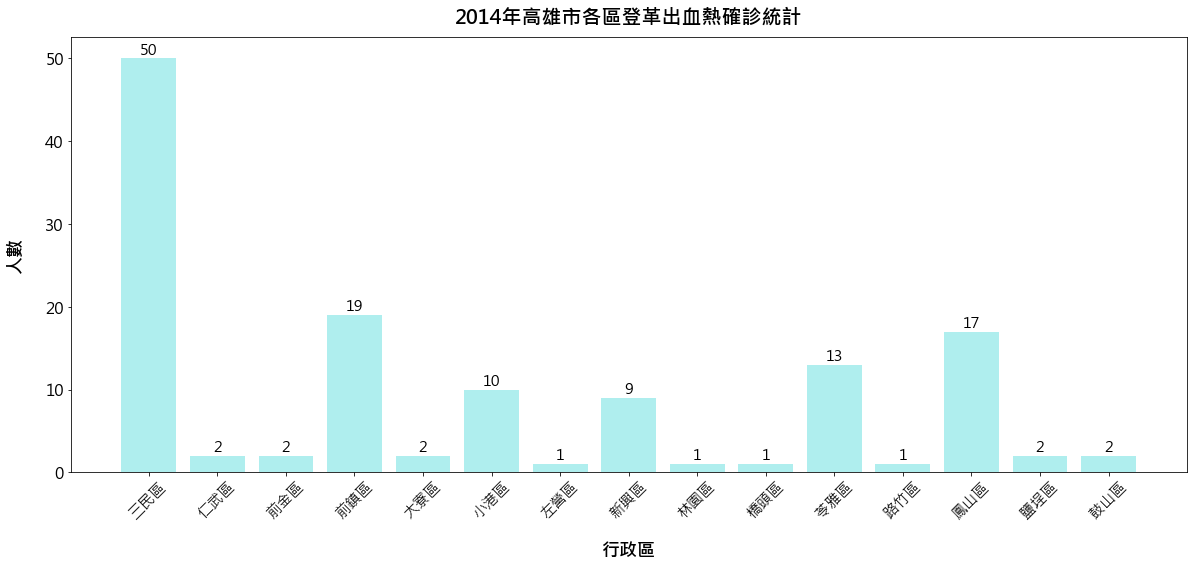

In [43]:
##### 第一題 #####


import pandas as pd
import matplotlib.pyplot as plt

##### 載入csv檔 #####
source = "登革出血熱.csv"
df = pd.read_csv(source)


##### 擷取資料 ##### => 下面有流程
DF = df[(df.縣市 == '高雄市') & (df.發病年份 == 2014 )]   # 擷取資料表中高雄市2014年的部分
                                                        # 也可醬寫 ---> df[(df['縣市'] == '高雄市') & (df['發病年份'] == 2014 )]
    

DF = DF.groupby('鄉鎮').sum()                           # 以各鄉鎮為單位，計算該鄉鎮 總確診人數

# DF = DF.sort_values(by='確定病例數', ascending=False) => 加入的話會根據 [確定病例數] 降冪排序

X = DF.index                                           # X軸為鄉鎮

Y = DF['確定病例數']                                    # Y軸為總確診人數


##### 畫圖 #####

plt.figure(figsize = (20,8))                             # 設定圖的大小 (寬,高)

plt.rcParams['font.family'] = 'Microsoft JhengHei'     # 解決中文編碼問題


plt.title('2014年高雄市各區登革出血熱確診統計', fontsize = 20, fontweight = "bold", y = 1.02)  # 設定標題
plt.xlabel('行政區', fontsize = 18, fontweight = "bold", labelpad = 20)                      # 設定XY軸標籤  
plt.ylabel('人數', fontsize = 18, fontweight = "bold", labelpad = 20)                       # labelpad是標籤跟刻度名稱的距離
plt.xticks(rotation = 45, fontsize = 15)                             # 設定XY刻度名稱                                                 
plt.yticks(fontsize = 16)                                            # x 傾斜 45度 => 才不會因為名稱太長擠在一起

bars = plt.bar(X, Y, color = 'paleturquoise')                        # 畫長條圖

for bar in bars:        # 長條圖頂端加入y值 => 照抄就對了XD
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha = 'center', va = 'bottom', fontsize = 15)

plt.show()    # 秀出乃


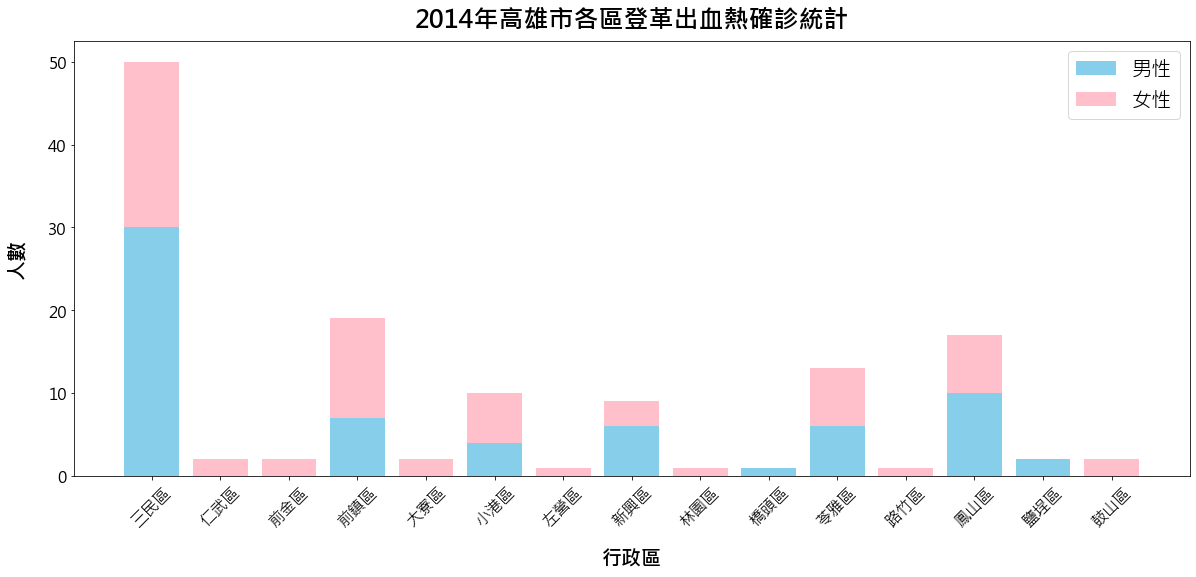

In [44]:
##### 第二題 #####


import pandas as pd
import matplotlib.pyplot as plt

##### 載入csv檔 #####
source = "登革出血熱.csv"
df = pd.read_csv(source)


##### 擷取資料 #####  => 下面有流程
DF = df[(df.縣市=='高雄市') & (df.發病年份==2014 )]  # 擷取資料表中高雄市2014年的部分


##### 建立樞紐表 #####
DF = pd.pivot_table(DF, index = ['鄉鎮'], columns = ['性別'], values = '確定病例數', aggfunc = 'sum', fill_value = 0)

# 以鄉鎮為單位 觀察各鄉鎮確診人數的男女比                             

# 用 aggfunc = ['sum'] 來加總確定病例數 => 預設是取平均

    

    
##### 畫圖 #####

plt.figure(figsize = (20,8))    # 設定圖的大小 (寬,高)

plt.rcParams['font.family'] = 'Microsoft JhengHei'  # 解決中文編碼問題


plt.title('2014年高雄市各區登革出血熱確診統計', fontsize = 25, fontweight = "bold", y = 1.02)  # 設定標題
plt.xlabel('行政區', fontsize = 20, fontweight = "bold", labelpad = 20)                      # 設定XY軸標籤
plt.ylabel('人數', fontsize = 20, fontweight = "bold", labelpad = 20)                       # labelpad是標籤跟刻度名稱的距離
plt.xticks(rotation = 45, fontsize = 16)                           # 設定XY刻度名稱 
plt.yticks(fontsize = 16)                                          # x 傾斜 45度 => 才不會因為名稱太長擠在一起

plt.bar(DF.index, DF['M'], label = '男性', color = 'skyblue')  # 畫長條圖
plt.bar(DF.index,DF['F'], bottom = DF['M'], label = '女性', color = 'pink') # 設定 bottom為男性y => 讓結果疊在一起
plt.legend(fontsize = 20) # 顯示右上角的男女標示

plt.show()  # 秀出乃



In [28]:
# 第一題流程

# 原始資料
source = "登革出血熱.csv"
df = pd.read_csv(source)


,確定病名,發病年份,發病週別,縣市,鄉鎮,性別,是否為境外移入,年齡層,確定病例數
0,登革出血熱/登革休克症候群,2003,2,高雄市,左營區,M,否,50-54,1
1,登革出血熱/登革休克症候群,2003,4,屏東縣,滿州鄉,F,否,40-44,1
2,登革出血熱/登革休克症候群,2004,33,新北市,汐止區,M,是,35-39,1
3,登革出血熱/登革休克症候群,2004,40,高雄市,苓雅區,M,否,25-29,1
4,登革出血熱/登革休克症候群,2004,41,屏東縣,屏東市,M,否,60-64,1
...,...,...,...,...,...,...,...,...,...
270,登革出血熱/登革休克症候群,2014,49,高雄市,前鎮區,M,否,50-54,1
271,登革出血熱/登革休克症候群,2014,49,高雄市,鳳山區,M,否,5-9,1
272,登革出血熱/登革休克症候群,2014,50,高雄市,三民區,M,否,70+,1
273,登革出血熱/登革休克症候群,2014,51,高雄市,三民區,F,否,70+,1


In [29]:
# 高雄市資料
DF = df[df['縣市']=='高雄市']
DF

,確定病名,發病年份,發病週別,縣市,鄉鎮,性別,是否為境外移入,年齡層,確定病例數
0,登革出血熱/登革休克症候群,2003,2,高雄市,左營區,M,否,50-54,1
3,登革出血熱/登革休克症候群,2004,40,高雄市,苓雅區,M,否,25-29,1
7,登革出血熱/登革休克症候群,2004,53,高雄市,大寮區,M,否,60-64,1
9,登革出血熱/登革休克症候群,2005,37,高雄市,旗津區,F,否,45-49,1
14,登革出血熱/登革休克症候群,2006,29,高雄市,鳳山區,F,否,50-54,1
...,...,...,...,...,...,...,...,...,...
270,登革出血熱/登革休克症候群,2014,49,高雄市,前鎮區,M,否,50-54,1
271,登革出血熱/登革休克症候群,2014,49,高雄市,鳳山區,M,否,5-9,1
272,登革出血熱/登革休克症候群,2014,50,高雄市,三民區,M,否,70+,1
273,登革出血熱/登革休克症候群,2014,51,高雄市,三民區,F,否,70+,1


In [33]:
# 高雄市 + 2014年資料

DF = DF[DF['發病年份']==2014]
DF

,確定病名,發病年份,發病週別,縣市,鄉鎮,性別,是否為境外移入,年齡層,確定病例數
156,登革出血熱/登革休克症候群,2014,25,高雄市,鳳山區,M,否,40-44,1
157,登革出血熱/登革休克症候群,2014,27,高雄市,小港區,M,否,70+,1
158,登革出血熱/登革休克症候群,2014,30,高雄市,三民區,M,否,65-69,1
159,登革出血熱/登革休克症候群,2014,30,高雄市,小港區,F,否,65-69,1
160,登革出血熱/登革休克症候群,2014,30,高雄市,前鎮區,F,否,25-29,1
...,...,...,...,...,...,...,...,...,...
270,登革出血熱/登革休克症候群,2014,49,高雄市,前鎮區,M,否,50-54,1
271,登革出血熱/登革休克症候群,2014,49,高雄市,鳳山區,M,否,5-9,1
272,登革出血熱/登革休克症候群,2014,50,高雄市,三民區,M,否,70+,1
273,登革出血熱/登革休克症候群,2014,51,高雄市,三民區,F,否,70+,1


In [34]:
# 擷取 '鄉鎮' & '確定病例數' 欄位

DF = DF[['鄉鎮','確定病例數']]
DF

,鄉鎮,確定病例數
156,鳳山區,1
157,小港區,1
158,三民區,1
159,小港區,1
160,前鎮區,1
...,...,...
270,前鎮區,1
271,鳳山區,1
272,三民區,1
273,三民區,1


In [35]:
# 將各鄉鎮群組起來 並將'確定病例數'加總  => 得到各鄉鎮的總病例數

DF = DF.groupby('鄉鎮').sum()
DF

,確定病例數
鄉鎮,
三民區,50
仁武區,2
前金區,2
前鎮區,19
大寮區,2
小港區,10
左營區,1
新興區,9
林園區,1


In [42]:
# 取得X軸(鄉鎮) & Y軸(對應總病例人數)
X = DF.index
Y = DF['確定病例數']

print(X)
print(Y)

Index(['三民區', '仁武區', '前金區', '前鎮區', '大寮區', '小港區', '左營區', '新興區', '林園區', '橋頭區',
       '苓雅區', '路竹區', '鳳山區', '鹽埕區', '鼓山區'],
      dtype='object', name='鄉鎮')
鄉鎮
三民區    50
仁武區     2
前金區     2
前鎮區    19
大寮區     2
小港區    10
左營區     1
新興區     9
林園區     1
橋頭區     1
苓雅區    13
路竹區     1
鳳山區    17
鹽埕區     2
鼓山區     2
Name: 確定病例數, dtype: int64


In [48]:
# 第二題流程

# 原始資料
source = "登革出血熱.csv"
df = pd.read_csv(source)

# 高雄市 + 2014年資料
DF = df[(df.縣市=='高雄市') & (df.發病年份==2014 )]  # 擷取資料表中高雄市2014年的部分
DF

,確定病名,發病年份,發病週別,縣市,鄉鎮,性別,是否為境外移入,年齡層,確定病例數
156,登革出血熱/登革休克症候群,2014,25,高雄市,鳳山區,M,否,40-44,1
157,登革出血熱/登革休克症候群,2014,27,高雄市,小港區,M,否,70+,1
158,登革出血熱/登革休克症候群,2014,30,高雄市,三民區,M,否,65-69,1
159,登革出血熱/登革休克症候群,2014,30,高雄市,小港區,F,否,65-69,1
160,登革出血熱/登革休克症候群,2014,30,高雄市,前鎮區,F,否,25-29,1
...,...,...,...,...,...,...,...,...,...
270,登革出血熱/登革休克症候群,2014,49,高雄市,前鎮區,M,否,50-54,1
271,登革出血熱/登革休克症候群,2014,49,高雄市,鳳山區,M,否,5-9,1
272,登革出血熱/登革休克症候群,2014,50,高雄市,三民區,M,否,70+,1
273,登革出血熱/登革休克症候群,2014,51,高雄市,三民區,F,否,70+,1


In [49]:
# 建立樞紐表  => 以鄉鎮為單位 看各鄉鎮男女之總病例數
DF = pd.pivot_table(DF, index = ['鄉鎮'], columns = ['性別'], values = '確定病例數', aggfunc = 'sum', fill_value = 0) # 空值填0
DF

性別,F,M
鄉鎮,,
三民區,20,30
仁武區,2,0
前金區,2,0
前鎮區,12,7
大寮區,2,0
小港區,6,4
左營區,1,0
新興區,3,6
林園區,1,0


In [53]:
# 取得X軸(鄉鎮) & Y軸(性別對應總病例人數)
X = DF.index
Y1 = DF['M']
Y2 = DF['F']
print(X)
print(Y1)
print(Y2)

Index(['三民區', '仁武區', '前金區', '前鎮區', '大寮區', '小港區', '左營區', '新興區', '林園區', '橋頭區',
       '苓雅區', '路竹區', '鳳山區', '鹽埕區', '鼓山區'],
      dtype='object', name='鄉鎮')
鄉鎮
三民區    30
仁武區     0
前金區     0
前鎮區     7
大寮區     0
小港區     4
左營區     0
新興區     6
林園區     0
橋頭區     1
苓雅區     6
路竹區     0
鳳山區    10
鹽埕區     2
鼓山區     0
Name: M, dtype: int64
鄉鎮
三民區    20
仁武區     2
前金區     2
前鎮區    12
大寮區     2
小港區     6
左營區     1
新興區     3
林園區     1
橋頭區     0
苓雅區     7
路竹區     1
鳳山區     7
鹽埕區     0
鼓山區     2
Name: F, dtype: int64
